**GRIP- The Sparks Foundation**

**Data Science & Business Analytics Intern**

**Task 1- Predicting Using Supervised ML**

**Predict the percentage of marks a student can score based on the number of study hours.**

**By- Aditi Godbole**

**Step 1- Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Step 2- Reading Data** 

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.columns


Data imported successfully


Index(['Hours', 'Scores'], dtype='object')

In [5]:
s_data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
s_data.shape

(25, 2)

In [9]:
#Checking if there is any null value in the dataset
s_data.isnull == True

False

**Step 3- Plotting the relationship between no. of hours studied and percentage score**

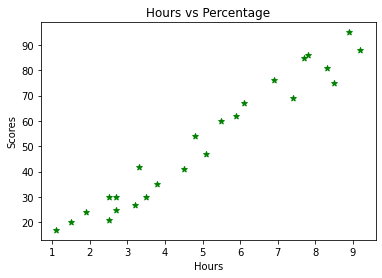

In [21]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(s_data.Hours, s_data.Scores, color= "green", marker = "*")
plt.title('Hours vs Percentage') 
plt.show()



In [11]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Step 4- Preparing the Data**

In [12]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [13]:
X[0:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [14]:
y[0:5]

array([21, 47, 27, 75, 30])

**Step 5- Splitting the data into training and testing sets**

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17,), (8,))

**Step 6- Training the Algorithm**

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [18]:
print(regressor.intercept_)

2.3708153823418883


In [19]:
print(regressor.coef_)

[9.78856669]


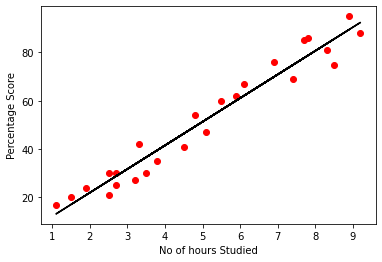

In [20]:


# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line, color='black');
plt.xlabel('No of hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.show()



**Step 7- Making Predictions**

In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


**Step 8-  Comapring Actual result to the Predicted Model Result**

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [26]:
# Estimating training and test score

print("Training Score:" , regressor.score(X_train,y_train))
print("Test Score:" , regressor.score(X_test,y_test))

Training Score: 0.9484997422695115
Test Score: 0.9568211104435257


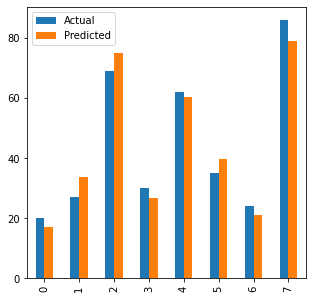

In [27]:
#Plotting Bar Graph between the actual and predicted values

df.plot(kind='bar', figsize=(5,5))
plt.show()

**Step 9- Evaluating Accuracy**

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


**Step 10- Predicted score if a student studies for 9.25 hrs/ day**

In [34]:
Hours = [9.25]
own_pred = regressor.predict([Hours])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0],4.5))

No of Hours = [9.25]
Predicted Score = 92.91505723477056
